In [61]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.transform as tfm
from matplotlib.colors import rgb_to_hsv
import skimage.morphology as morph
import sys

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
def distance(a, b):
    return np.abs(a-b)

def region_growing_average(img, img_t, tolerance, seed):
    
    #img_t = np.zeros(img.shape)
    x = int(seed[0]); y = int(seed[1])

    img_t[x, y] = 1
    
    avg = np.mean(img[np.where(img_t==1)])
    
    # check matrix border and conquering criterion for the 4-neigbourhood
    if (y+1 < img.shape[1] and img_t[x,y+1] == 0 and distance(avg, img[x, y+1]) <= tolerance):
        region_growing_average(img, img_t, tolerance, [x, y+1])
        
    if (y-1 >= 0 and img_t[x,y-1] == 0  and distance(avg, img[x, y-1]) <= tolerance):
        region_growing_average(img, img_t, tolerance, [x, y-1])
        
    if (x+1 < img.shape[0] and img_t[x+1,y] == 0  and distance(avg, img[x+1, y]) <= tolerance):
        region_growing_average(img, img_t, tolerance, [x+1, y])
        
    if (x-1 >= 0 and img_t[x-1,y] == 0  and distance(avg, img[x-1, y]) <= tolerance):
        region_growing_average(img, img_t, tolerance, [x-1, y])
        
    #return img_t

In [64]:
def normalize_minmax(f, factor):
    f_min = np.min(f)
    f_max = np.max(f)
    f = (f - f_min)/(f_max-f_min)
    return (f*factor)

def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = normalize_minmax(new_img, 255)
    
    return new_img

(-0.5, 959.5, 1279.5, -0.5)

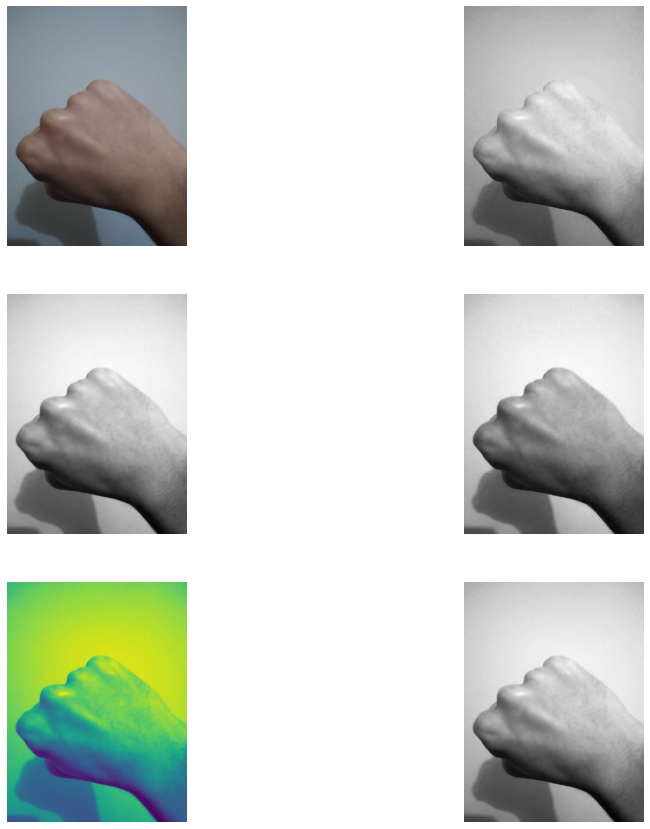

In [65]:
img = imageio.imread("/content/drive/Shared drives/Equipe amigos/2020.1/PDI/Rock_v1.jpg")

plt.figure(figsize=(15,15))
plt.subplot(321); plt.imshow(img); plt.axis('off')
plt.subplot(322); plt.imshow(img[:,:,0], cmap="gray"); plt.axis('off')
plt.subplot(323); plt.imshow(img[:,:,1], cmap="gray"); plt.axis('off')
plt.subplot(324); plt.imshow(img[:,:,2], cmap="gray"); plt.axis('off')
plt.subplot(325); plt.imshow(Luminance(img)); plt.axis('off')
plt.subplot(326); plt.imshow(Luminance(img), cmap="gray"); plt.axis('off')

(160, 120)


(-0.5, 119.5, 159.5, -0.5)

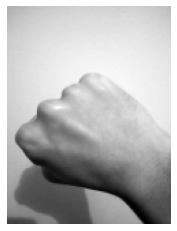

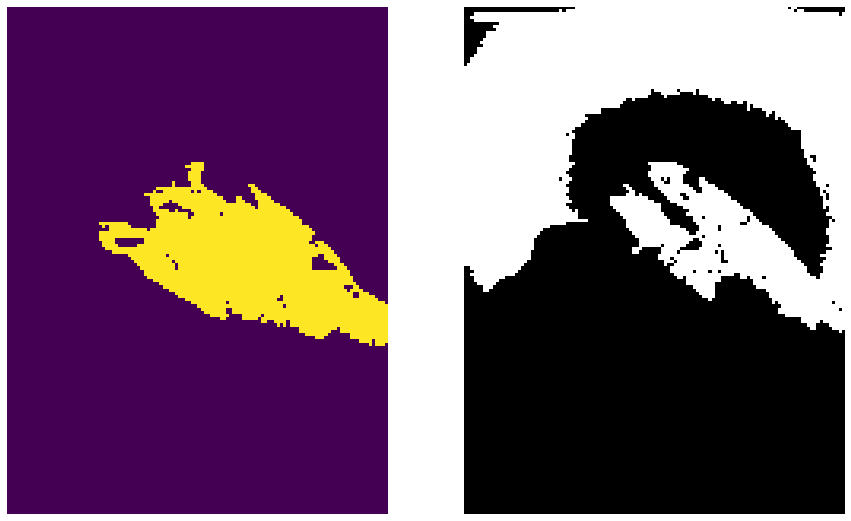

In [66]:
gray_img = Luminance(img)

gray_img = tfm.downscale_local_mean(gray_img, (8, 8))
#imageio.imwrite("/content/drive/Shared drives/Equipe amigos/2020.1/PDI/Rock_blackWhite.jpg", gray_img)

print(gray_img.shape)
plt.imshow(gray_img, cmap="gray"); plt.axis('off')

processed_img1 = np.zeros(gray_img.shape)
processed_img2 = np.zeros(gray_img.shape)

sys.setrecursionlimit(30000)

region_growing_average(gray_img, processed_img1, 16, [gray_img.shape[0]/2, gray_img.shape[1]/2])
region_growing_average(gray_img, processed_img2, 16, [3,3])

plt.figure(figsize=(15,15))
plt.subplot(121); plt.imshow(processed_img1); plt.axis('off')
plt.subplot(122); plt.imshow(processed_img2, cmap="gray"); plt.axis('off')

In [67]:
def median_filter(img, filterSize=3):
  filterRadius = filterSize//2
  print(img)
  img_pad = np.pad(img, ((filterRadius, ),(filterRadius, )), 'edge')
  print(img_pad)

  filtered_img = np.zeros(img_pad.shape)
  for x in np.arange(filterRadius, img_pad.shape[0]-filterRadius+1):
    for y in np.arange(filterRadius, img_pad.shape[1]-filterRadius+1):
      med_region = np.median(img_pad[x-filterRadius:x+filterRadius+1, y-filterRadius:y+filterRadius+1])
      filtered_img[x,y] = med_region

  return filtered_img[filterRadius:img_pad.shape[0]-filterRadius+1, filterRadius:img_pad.shape[1]-filterRadius+1]


[[174.03708126 170.70853209 172.54548469 ... 187.59723489 180.14555341
  180.09473586]
 [170.73394086 173.98626372 170.91932326 ... 185.94566469 184.99862892
  184.92240261]
 [173.93544617 175.68865147 175.66324269 ... 187.62264366 184.94781138
  184.97322015]
 ...
 [ 71.61350686  71.81677704  71.61350686 ...  75.00994828  78.28767991
   78.23686237]
 [ 67.99631403  66.31933506  68.50794507 ...  68.60693765  73.38378685
   75.00994828]
 [ 67.99631403  64.74399117  65.23021344 ...  68.50530256  75.00994828
   76.58529217]]
[[174.03708126 174.03708126 174.03708126 ... 180.09473586 180.09473586
  180.09473586]
 [174.03708126 174.03708126 174.03708126 ... 180.09473586 180.09473586
  180.09473586]
 [174.03708126 174.03708126 174.03708126 ... 180.09473586 180.09473586
  180.09473586]
 ...
 [ 67.99631403  67.99631403  67.99631403 ...  76.58529217  76.58529217
   76.58529217]
 [ 67.99631403  67.99631403  67.99631403 ...  76.58529217  76.58529217
   76.58529217]
 [ 67.99631403  67.99631403  67.

(-0.5, 120.5, 160.5, -0.5)

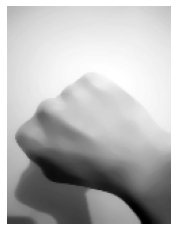

In [68]:
gray_img = Luminance(img)

gray_img = tfm.downscale_local_mean(gray_img, (8, 8))

filtered_img = median_filter(gray_img, 9)

plt.imshow(filtered_img, cmap="gray"); plt.axis('off')


[[129.0039   130.75     131.74219  ... 137.23438  135.9961   133.48828 ]
 [130.77734  131.00781  132.50781  ... 139.50781  137.26562  135.48828 ]
 [131.7461   132.25     134.26562  ... 140.75     138.71484  137.71094 ]
 ...
 [ 86.00391   86.57422   87.53906  ...  67.75391   70.5       71.99219 ]
 [ 62.226562  62.179688  61.953125 ...  66.72266   69.00391   71.99219 ]
 [ 57.242188  57.003906  56.75     ...  61.25      65.265625  68.99219 ]]
[[129.0039   129.0039   130.75     ... 135.9961   133.48828  133.48828 ]
 [129.0039   129.0039   130.75     ... 135.9961   133.48828  133.48828 ]
 [130.77734  130.77734  131.00781  ... 137.26562  135.48828  135.48828 ]
 ...
 [ 62.226562  62.226562  62.179688 ...  69.00391   71.99219   71.99219 ]
 [ 57.242188  57.242188  57.003906 ...  65.265625  68.99219   68.99219 ]
 [ 57.242188  57.242188  57.003906 ...  65.265625  68.99219   68.99219 ]]


(-0.5, 60.5, 80.5, -0.5)

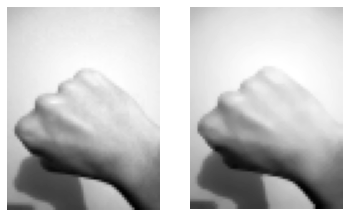

In [97]:
#Oliver, to implementando um outro jeito. Nas aulas de morforlogia matemática ele mostra a técnica de detecção de bordas.
#Vou tentar fazer a detecção na imagem sem o filtro e com o filtro e tbm vou mudar o jeito q a gente pega a imagem preto e branco
#a gente ta fazendo "manualmente", mas se a gente transformar de RGB pra HSV já sai com o valor certinho.

img_hsv = rgb_to_hsv(img)
img_hsv_gray = img_hsv[:,:,2]
img_hsv_gray = tfm.downscale_local_mean(img_hsv_gray, (16, 16))

img_hsv_filter = median_filter(img_hsv_gray)


plt.subplot(121); plt.imshow(img_hsv_gray, cmap="gray"); plt.axis('off')
plt.subplot(122); plt.imshow(img_hsv_filter, cmap="gray"); plt.axis('off')

(-0.5, 60.5, 80.5, -0.5)

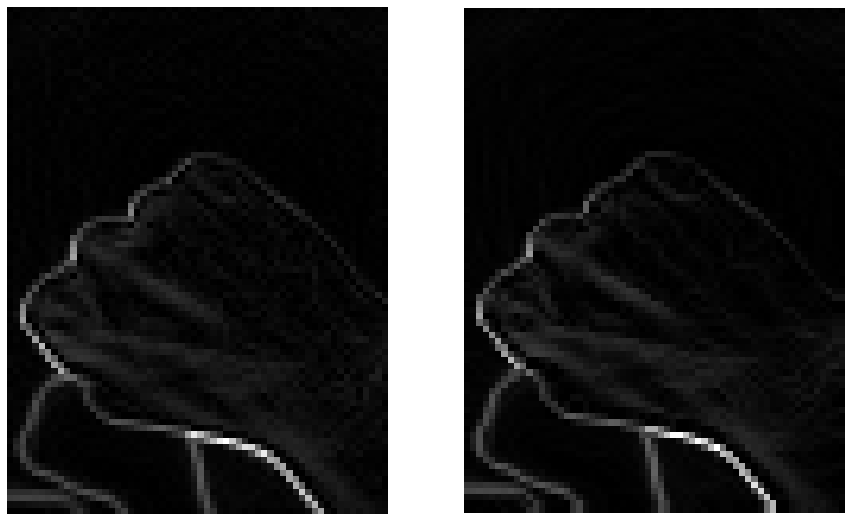

In [98]:
#Agora que temos as duas imagens, com e sem o filtro, vamos tentar fazer a detecção da borda

border = img_hsv_gray - morph.erosion(img_hsv_gray, morph.disk(1))
border_filter = img_hsv_filter - morph.erosion(img_hsv_filter, morph.disk(1))
plt.figure(figsize=(15,15))
plt.subplot(121); plt.imshow(border, cmap="gray"); plt.axis('off')
plt.subplot(122); plt.imshow(border_filter, cmap="gray"); plt.axis('off')

(-0.5, 60.5, 80.5, -0.5)

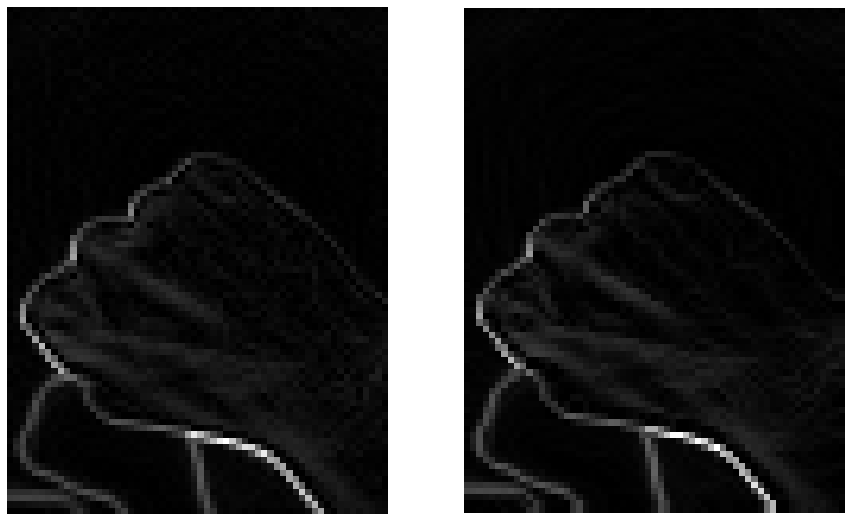

In [99]:
border_s = img_hsv_gray - morph.erosion(img_hsv_gray, morph.diamond(1))
border_filter_s = img_hsv_filter - morph.erosion(img_hsv_filter, morph.diamond(1))
plt.figure(figsize=(15,15))
plt.subplot(121); plt.imshow(border_s, cmap="gray"); plt.axis('off')
plt.subplot(122); plt.imshow(border_filter_s, cmap="gray"); plt.axis('off')

(-0.5, 60.5, 80.5, -0.5)

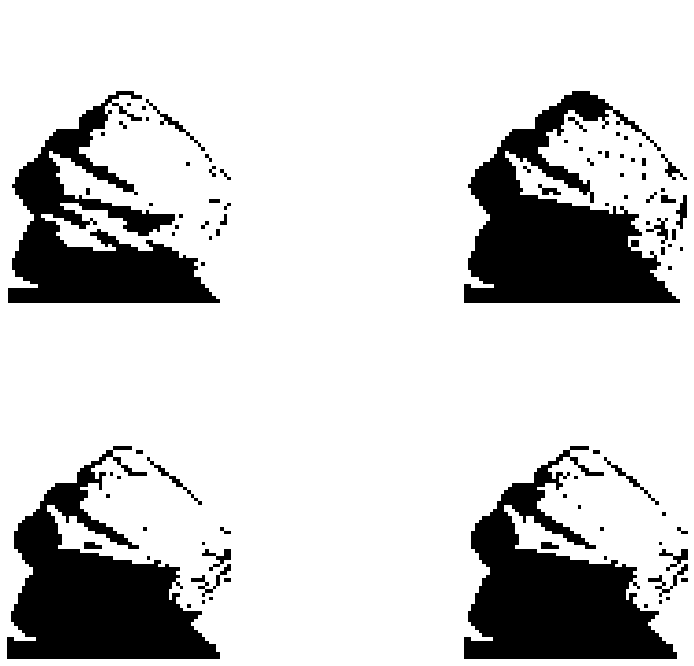

In [100]:
processed_border1 = np.zeros(border.shape)
processed_border2 = np.zeros(border.shape)
processed_border_filter1 = np.zeros(border_filter.shape)
processed_border_filter2 = np.zeros(border_filter.shape)


sys.setrecursionlimit(30000)

region_growing_average(border, processed_border1, 4, [border.shape[0]/2, border.shape[1]/2])
region_growing_average(border_filter, processed_border_filter1, 4, [border_filter.shape[0]/2, border_filter.shape[1]/2])
region_growing_average(border, processed_border2, 4, [3,3])
region_growing_average(border_filter, processed_border_filter2, 4, [3,3])

plt.figure(figsize=(15, 12))
plt.subplot(221); plt.imshow(processed_border1, cmap="gray"); plt.axis('off')
plt.subplot(222); plt.imshow(processed_border2, cmap="gray"); plt.axis('off')
plt.subplot(223); plt.imshow(processed_border_filter1, cmap="gray"); plt.axis('off')
plt.subplot(224); plt.imshow(processed_border_filter2, cmap="gray"); plt.axis('off')


[[45.966797 47.182617 47.557617 ... 50.93164  49.79004  49.71289 ]
 [49.660156 50.65918  50.652344 ... 56.56836  54.989258 55.387695]
 [51.9541   52.98535  54.25586  ... 59.73535  58.504883 57.74414 ]
 ...
 [37.45508  36.649414 28.160156 ... 38.746094 39.629883 37.714844]
 [34.362305 30.137695 23.628906 ... 38.274414 38.493164 37.45703 ]
 [22.87793  18.333008 16.708008 ... 28.961914 27.91211  26.823242]]
[[45.966797 45.966797 47.182617 ... 49.79004  49.71289  49.71289 ]
 [45.966797 45.966797 47.182617 ... 49.79004  49.71289  49.71289 ]
 [49.660156 49.660156 50.65918  ... 54.989258 55.387695 55.387695]
 ...
 [34.362305 34.362305 30.137695 ... 38.493164 37.45703  37.45703 ]
 [22.87793  22.87793  18.333008 ... 27.91211  26.823242 26.823242]
 [22.87793  22.87793  18.333008 ... 27.91211  26.823242 26.823242]]


(-0.5, 92.5, 123.5, -0.5)

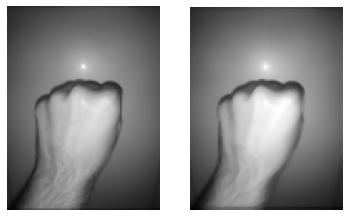

In [101]:
#A sombra da foto está atrapalhando bastante, por isso vou tentar usar uma foto com flash para ver a diferença nos resultados.
img_flash = imageio.imread("/content/drive/Shared drives/Equipe amigos/2020.1/PDI/Rock_v3.jpg")

img_hsv2 = rgb_to_hsv(img_flash)
img_hsv_gray2 = img_hsv2[:,:,2]
img_hsv_gray2 = tfm.downscale_local_mean(img_hsv_gray2, (32, 32))

img_hsv_filter2 = median_filter(img_hsv_gray2)


plt.subplot(121); plt.imshow(img_hsv_gray2, cmap="gray"); plt.axis('off')
plt.subplot(122); plt.imshow(img_hsv_filter2, cmap="gray"); plt.axis('off')

(-0.5, 92.5, 123.5, -0.5)

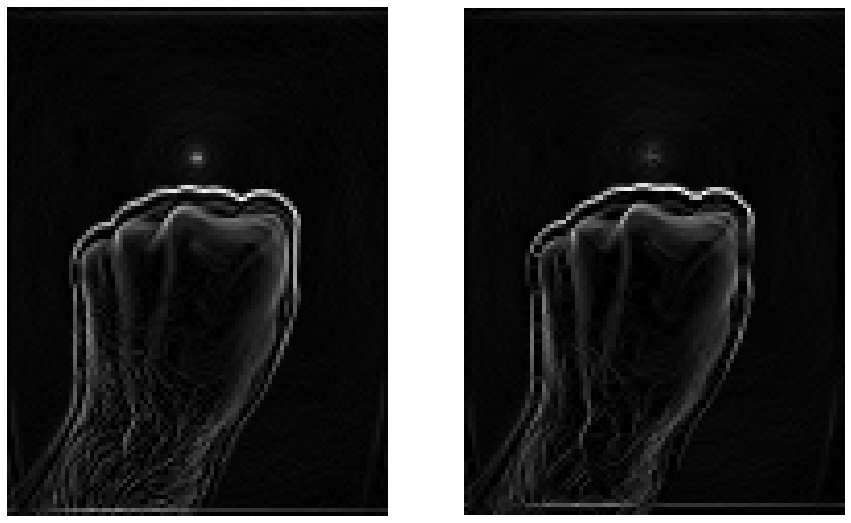

In [102]:
border2 = img_hsv_gray2 - morph.erosion(img_hsv_gray2, morph.disk(1))
border_filter2 = img_hsv_filter2 - morph.erosion(img_hsv_filter2, morph.disk(1))
plt.figure(figsize=(15,15))
plt.subplot(121); plt.imshow(border2, cmap="gray"); plt.axis('off')
plt.subplot(122); plt.imshow(border_filter2, cmap="gray"); plt.axis('off')

(-0.5, 92.5, 123.5, -0.5)

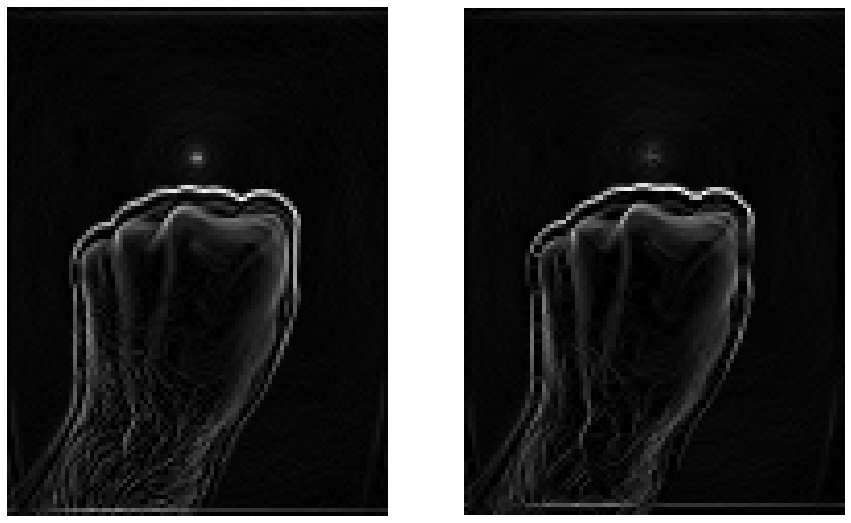

In [103]:
border_s2 = img_hsv_gray2 - morph.erosion(img_hsv_gray2, morph.diamond(1))
border_filter_s2 = img_hsv_filter2 - morph.erosion(img_hsv_filter2, morph.diamond(1))
plt.figure(figsize=(15,15))
plt.subplot(121); plt.imshow(border_s2, cmap="gray"); plt.axis('off')
plt.subplot(122); plt.imshow(border_filter_s2, cmap="gray"); plt.axis('off')

(-0.5, 92.5, 123.5, -0.5)

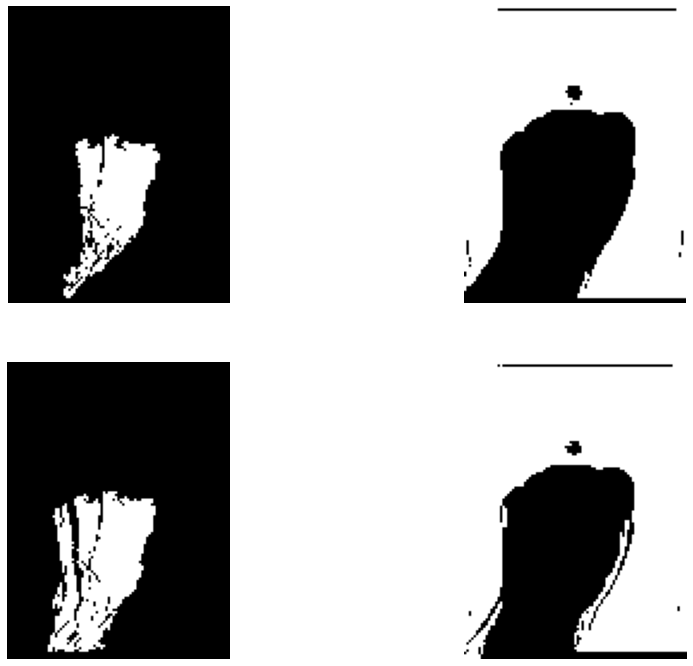

In [104]:
processed_border12 = np.zeros(border2.shape)
processed_border22 = np.zeros(border2.shape)
processed_border_filter12 = np.zeros(border_filter2.shape)
processed_border_filter22 = np.zeros(border_filter2.shape)


sys.setrecursionlimit(30000)

region_growing_average(border2, processed_border12, 4, [border2.shape[0]/2, border2.shape[1]/2])
region_growing_average(border_filter2, processed_border_filter12, 4, [border_filter2.shape[0]/2, border_filter2.shape[1]/2])
region_growing_average(border2, processed_border22, 4, [3,3])
region_growing_average(border_filter2, processed_border_filter22, 4, [3,3])

plt.figure(figsize=(15, 12))
plt.subplot(221); plt.imshow(processed_border12, cmap="gray"); plt.axis('off')
plt.subplot(222); plt.imshow(processed_border22, cmap="gray"); plt.axis('off')
plt.subplot(223); plt.imshow(processed_border_filter12, cmap="gray"); plt.axis('off')
plt.subplot(224); plt.imshow(processed_border_filter22, cmap="gray"); plt.axis('off')
